current time Sun Apr 24 10:42:42 2022
Most recent run  was nan
Looks like program hasn't been run recently
the yeild for a  1 Month bond is  0.444
the yeild for a  3 Month bond is  0.815
the yeild for a  6 Month bond is  1.324
the yeild for a  1 Year bond is  1.955
the yeild for a  2 Year bond is  2.699
the yeild for a  3 Year bond is  2.868
the yeild for a  5 Year bond is  2.926
the yeild for a  7 Year bond is  2.981
the yeild for a  10 Year bond is  2.917
the yeild for a  30 Year bond is  2.938
Data writen to file


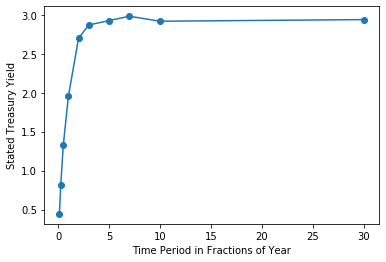

In [1]:
websites = ["https://www.marketwatch.com/investing/bond/tmubmusd01m?countryCode=BX",
            "https://www.marketwatch.com/investing/bond/tmubmusd03m?countryCode=BX",
            "https://www.marketwatch.com/investing/bond/tmubmusd06m?countryCode=BX",
            "https://www.marketwatch.com/investing/bond/tmubmusd01y?countryCode=BX",
            "https://www.marketwatch.com/investing/bond/tmubmusd02y?countryCode=BX",
            "https://www.marketwatch.com/investing/bond/tmubmusd03y?countryCode=BX",
            "https://www.marketwatch.com/investing/bond/tmubmusd05y?countryCode=BX",
            "https://www.marketwatch.com/investing/bond/tmubmusd07y?countryCode=BX",
            "https://www.marketwatch.com/investing/bond/tmubmusd10y?countryCode=BX",
            "https://www.marketwatch.com/investing/bond/tmubmusd30y?countryCode=BX"]
x_axis = ["1 Month", "3 Month", "6 Month", "1 Year", "2 Year","3 Year","5 Year",
          "7 Year","10 Year", "30 Year"]
y_axis = []
dates = []

try:
    from bs4 import BeautifulSoup
except:
    print ("Please install beautiful soup")
try:    
    import requests
except:
    print ("Please install requests")
    
try:
    from matplotlib import pyplot as plt
except:
    print ("Please install matplotlib")
try:
    import pandas as pd
except:
    print ("Please install pandas")
    
import re
import time
index = 0

######### Checking for last run ##############

current_time = time.ctime() #check current time to see how long since last run
print ("current time", current_time)

try:
    most_recent_run = pd.read_csv("output.csv")



    x = int(len(most_recent_run["Date"])-1) #find length of date sequence for recent run
    most_recent_run = (most_recent_run["Date"][x])
    print ("Most recent run  was", most_recent_run)

    if (current_time[0:10]) == (most_recent_run[0:10]):
        print ("Program already run today, results will display")
        print ("but data will not write to csv since no change")
        write = "No" 
        
    else:
        print ("Last run time was a while ago, we will write to file")
        write = "Yes"
        
        
except:
    print ("Looks like program hasn't been run recently")
    write = "Yes"




#################           Running The Program   ##########

for i in websites:

    html_text = requests.get(websites[index])
    hit = re.findall("table__cell u-semi.>[0-9]\.[0-9][0-9][0-9]%", html_text.text)
    hit = str(hit)
    
    for i in (re.findall("[0-9]\.[0-9][0-9][0-9]", hit)):
        temp_yield = i
        print ("the yeild for a ", str(x_axis[index]), 'bond is ', str(temp_yield))
        y_axis.append(float(temp_yield))
        dates.append(time.ctime())
    index += 1
    
alt_x  = [.12, .25, .5,1,2,3,5,7,10,30]
plt.plot(alt_x, y_axis, linestyle = "-", marker = "o")
plt.xlabel ("Time Period in Fractions of Year")
plt.ylabel ("Stated Treasury Yield")

##### Write to file if needed ##############

    
if write != "No":

    df = pd.DataFrame()
    df["Date"] = pd.Series(dates)
    df["Yields"] = pd.Series(y_axis)
    df["Note Duration"] = pd.Series(x_axis)
    df.to_csv("output.csv", mode = "a", header = "False")
    print ("Data writen to file")
    
#############
